In [1]:
import geopandas as gpd
from shapely import geometry
import matplotlib.pyplot as plt

In [2]:
with open('hansen_db/urls/treecover2000.txt') as file:
    treecover_urls = list(file.readlines())
    treecover_urls = list(map(lambda x: x.strip(), treecover_urls))
    
with open('hansen_db/urls/mosaic2000.txt') as file:
    mosaic_2000_urls = list(file.readlines())
    mosaic_2000_urls = list(map(lambda x: x.strip(), mosaic_2000_urls))
    
with open('hansen_db/urls/mosaic2019.txt') as file:
    mosaic_2019_urls = list(file.readlines())
    mosaic_2019_urls = list(map(lambda x: x.strip(), mosaic_2019_urls))
    
u = treecover_urls[0]
u

'https://storage.googleapis.com/earthenginepartners-hansen/GFC2015/Hansen_GFC2015_treecover2000_00N_000E.tif'

In [3]:
def get_hansen_box(treecover_url):
    maxy, minx = int(treecover_url[-12: -10]), int(treecover_url[-8: -5])
    if treecover_url[-5] == 'W':
        minx *= -1
    if treecover_url[-10] == 'S':
        maxy *= -1
    miny, maxx = maxy - 10, minx + 10
    bbox = geometry.box(minx, miny, maxx, maxy)
    return bbox

In [4]:
bboxes = list(map(get_hansen_box, treecover_urls))

In [5]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

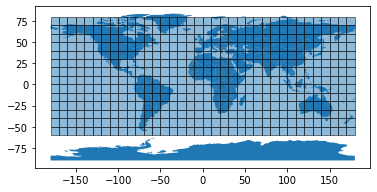

In [6]:
fig, ax = plt.subplots()
world.plot(ax=ax)
df = gpd.GeoDataFrame({'treecover_2000_url': treecover_urls,
                       'mosaic_2000_url': mosaic_2000_urls,
                       'mosaic_2019_url': mosaic_2019_urls
                      },
                      geometry=bboxes,
                      crs={'init': 'epsg:4326'})
df.plot(ax=ax, alpha=.5, edgecolor='black')

In [7]:
df.to_file('hansen_db/hansen_db.geojson', driver='GeoJSON')

/Users/cmarshak/anaconda3/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
